In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Check for GPU availability (optional)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [ ]:
# For simplicity, we create a small synthetic dataset.
# Let's say we're doing a regression task where we try to learn y =-x^2 + 2x + 1

# Generate random data points
torch.manual_seed(0)  # for reproducibility
X = torch.linspace(-10, 10, steps=100).view(-1, 1)
y = -1*X**2 + 2 * X + 1 + torch.randn(X.size()) * 2  # adding noise

# Move data to the device
X, y = X.to(device), y.to(device)

print("Sample input:", X[:5])
print("Sample target:", y[:5])


Sample input: tensor([[-10.0000],
        [ -9.7980],
        [ -9.5960],
        [ -9.3939],
        [ -9.1919]])
Sample target: tensor([[-121.2517],
        [-116.9011],
        [-110.7755],
        [-106.9017],
        [-100.1778]])


In [ ]:
# Define a simple feedforward neural network with one hidden layer
class SimpleNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=4, output_size=1):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # first (hidden) layer
        self.fco = nn.Linear(hidden_size, output_size) # output layer


    def forward(self, x):
        # Forward pass: compute hidden activation using ReLU, then output
        h1 = F.relu(self.fc1(x))
        out = self.fco(h1)
        return out

# Instantiate the network and move it to the device
model = SimpleNet().to(device)
print(model)


SimpleNet(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
  (fco): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
# Loss Function: Mean Squared Error (MSE) is common for regression
criterion = nn.MSELoss()

# Optimizer: Using Adam (Stochastic Gradient Descent) to update weights
learning_rate = 0.1
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# Training loop to illustrate forward pass, loss computation, backpropagation, and weight update
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass: compute predicted outputs by passing inputs to the model
    predictions = model(X)

    # Compute loss: difference between predictions and actual target values
    loss = criterion(predictions, y)

    # Backward pass: compute gradient of the loss with respect to model parameters
    optimizer.zero_grad()  # Zero gradients before running the backward pass
    loss.backward()        # Backpropagation: compute gradients

    # Update weights using the optimizer (Gradient Descent step)
    optimizer.step()

    if (epoch+1) %100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 80.8666
Epoch [200/1000], Loss: 27.2956
Epoch [300/1000], Loss: 18.1795
Epoch [400/1000], Loss: 16.3890
Epoch [500/1000], Loss: 15.5998
Epoch [600/1000], Loss: 15.1357
Epoch [700/1000], Loss: 15.0236
Epoch [800/1000], Loss: 14.9970
Epoch [900/1000], Loss: 14.9922
Epoch [1000/1000], Loss: 14.9909


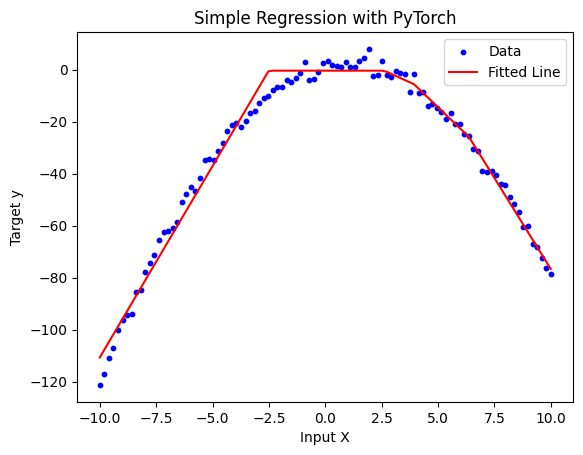

In [ ]:
# Let's see how the model fits the data
import matplotlib.pyplot as plt

# Set model to evaluation mode (not strictly needed here but good practice)
model.eval()
with torch.no_grad():
    predictions = model(X).cpu()

# Plot the original data and the fitted line
plt.scatter(X.cpu(), y.cpu(), label="Data", color="blue", s=10)
plt.plot(X.cpu(), predictions, label="Fitted Line", color="red")
plt.xlabel("Input X")
plt.ylabel("Target y")
plt.legend()
plt.title("Simple Regression with PyTorch")
plt.show()


In [ ]:
# Example: Let y = (2x + 3)^2. We will compute dy/dx manually using autograd.
x = torch.tensor(5.0, requires_grad=True)  # input variable
y = (2 * x + 3) ** 2  # function of x
print("y =", y.item())

# Compute the derivative dy/dx
y.backward()
print("dy/dx =", x.grad.item())

# Explanation:
# For y = (2x + 3)^2, by chain rule:
#   dy/dx = 2*(2x + 3)*2 = 4*(2x + 3).
# At x = 5, dy/dx = 4*(10 + 3) = 52.


y = 169.0
dy/dx = 52.0


# Assignment: Building a Neural Network for MNIST using PyTorch

## Objective
The goal of this assignment is to implement a simple neural network using PyTorch to classify handwritten digits from the MNIST dataset. You will define the model architecture, loss function, training loop, and evaluation metrics, including accuracy and a confusion matrix.

## Tasks

### 1. Setup and Data Loading
- Import the required libraries.
- Load the MNIST dataset using `torchvision.datasets.MNIST`.
- Normalize the dataset and create DataLoader objects for training and testing.

### 2. Define the Neural Network
- Create a neural network class using `torch.nn.Module`.
- Define the architecture with at least one hidden layer.
- Use appropriate activation functions.

### 3. Define the Loss Function and Optimizer
- Research and implement `torch.nn.CrossEntropyLoss`.
- Explain the role of softmax in multi-class classification and how CrossEntropyLoss internally handles it.
- Choose an appropriate optimizer (e.g., `torch.optim.Adam` or `torch.optim.SGD`).

### 4. Implement the Training Loop
- Iterate through multiple epochs.
- Perform forward propagation, compute loss, and update weights using backpropagation.
- Print loss at regular intervals.

### 5. Evaluate the Model
- Calculate accuracy on the test set.
- Use `sklearn.metrics.confusion_matrix` to generate a confusion matrix.
- Plot the confusion matrix and accuracy graph using `matplotlib`.





In [ ]:
# --- 1. Setup and Data Loading ---
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [ ]:

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [ ]:

# Define transformations: Convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 52.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.55MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.80MB/s]


In [ ]:

# Create DataLoaders
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
# --- 2. Define the Neural Network ---
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer (28x28 pixels) → Hidden layer (128 neurons)
        self.fc2 = nn.Linear(128, 64)  # Hidden layer → Hidden layer (64 neurons)
        self.fc3 = nn.Linear(64, 10)   # Hidden layer → Output (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = torch.relu(self.fc1(x))  # Activation function (ReLU)
        x = torch.relu(self.fc2(x))  # Activation function (ReLU)
        x = self.fc3(x)  # Output layer (logits, no activation here)
        return x

# Instantiate the model and move it to the device
model = MNISTNet().to(device)
print(model)


MNISTNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# --- 3. Define Loss Function and Optimizer ---
criterion = nn.CrossEntropyLoss()  # Softmax + Negative Log Likelihood
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [ ]:
num_epochs = 5
loss_values = []  # Store loss per epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    loss_values.append(avg_loss)  # Store average loss for the epoch

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/5], Loss: 0.0877
Epoch [2/5], Loss: 0.0760
Epoch [3/5], Loss: 0.0693
Epoch [4/5], Loss: 0.0625
Epoch [5/5], Loss: 0.0576


In [ ]:
# --- 5. Evaluate the Model ---
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.44%


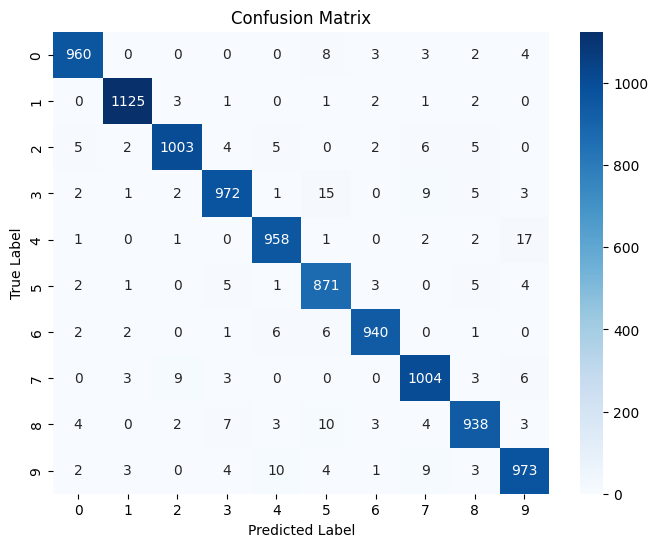

In [ ]:
# --- 6. Confusion Matrix ---
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

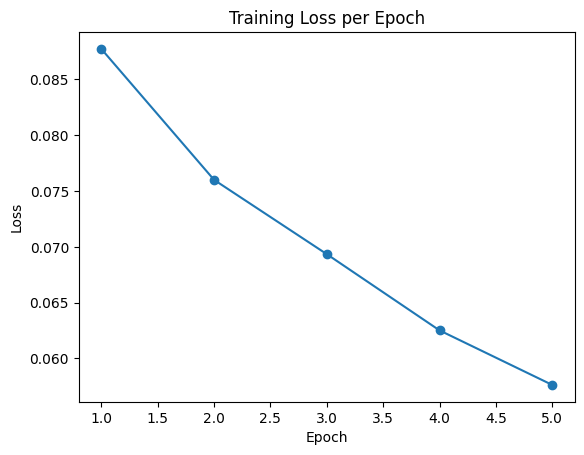

In [ ]:
# --- 7. Plot Accuracy ---
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.show()